In [0]:
# We start by doing the required imports

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N = 100 # Number of data points
X = np.random.random(N) * 10 - 5 # Random data in range [-5, 5]
y = 0.5 * X - 1 + np.random.randn(N) # A line plus noise

# True slope = 0.5
# True line intercept = -1
# Gaussia noise with mean=0 and variance=1 is added as this is directly linked with MSE as a loss function

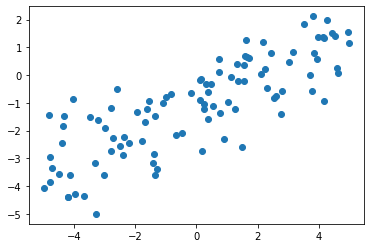

In [0]:
plt.scatter(X, y) # Visualise the data

In [0]:
# Create the linear regression model 
# The model has 1 input and 1 output
model = nn.Linear(1,1)

In [0]:
# Define the loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.05)

In [0]:
# Reshape the data and define the inputs
X = X.reshape(N,1) # Number of samples x Number of Dimensions
y = y.reshape(N,1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [0]:
# Now we train the model
number_epochs = 30
losses = []
for iteration in range(number_epochs):
    optimizer.zero_grad() # zero the parameter gradients. PyTorch accumulates the gradients for every .backward() call
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print('Epoch {}/{}, Loss: {}'.format(iteration+1, number_epochs, loss.item()))

Epoch 1/30, Loss: 18.3820743560791
Epoch 2/30, Loss: 2.137620449066162
Epoch 3/30, Loss: 1.574477195739746
Epoch 4/30, Loss: 1.4499017000198364
Epoch 5/30, Loss: 1.357723355293274
Epoch 6/30, Loss: 1.2832876443862915
Epoch 7/30, Loss: 1.2230000495910645
Epoch 8/30, Loss: 1.1741664409637451
Epoch 9/30, Loss: 1.134610891342163
Epoch 10/30, Loss: 1.1025702953338623
Epoch 11/30, Loss: 1.0766174793243408
Epoch 12/30, Loss: 1.05559504032135
Epoch 13/30, Loss: 1.0385667085647583
Epoch 14/30, Loss: 1.0247735977172852
Epoch 15/30, Loss: 1.0136009454727173
Epoch 16/30, Loss: 1.0045510530471802
Epoch 17/30, Loss: 0.997220516204834
Epoch 18/30, Loss: 0.9912826418876648
Epoch 19/30, Loss: 0.9864730834960938
Epoch 20/30, Loss: 0.9825772047042847
Epoch 21/30, Loss: 0.9794214367866516
Epoch 22/30, Loss: 0.9768652319908142
Epoch 23/30, Loss: 0.974794864654541
Epoch 24/30, Loss: 0.9731175899505615
Epoch 25/30, Loss: 0.9717590808868408
Epoch 26/30, Loss: 0.9706587791442871
Epoch 27/30, Loss: 0.9697675108

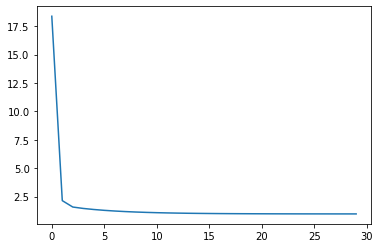

In [0]:
# Plot the losses
plt.plot(losses)

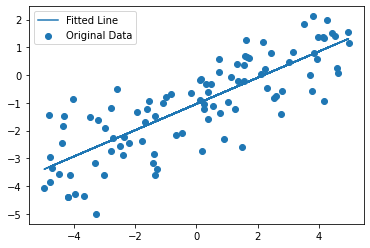

In [0]:
# Plot the graph of predictions
predicted = model(inputs).detach().numpy()
plt.scatter(X, y, label='Original Data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [0]:
# Test the model values (true w = 0.5, b = -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.47291148]] [-1.0416733]
